# Black Litterman Mean Risk Optimization

## 1. Downloading the data:

| 티커  | 설명 | 
|-------|------|
| **JCI** | Johnson Controls International plc: 건물 제품 및 시스템을 설계, 제조, 설치 및 서비스하는 글로벌 기업. 주로 상업용 HVAC 시스템, 통합 전자 보안 시스템 및 화재 감지 및 진압 시스템을 제공합니다. |
| **TGT** | Target Corporation: 미국의 대형 소매 체인으로, 다양한 소비자 제품을 판매하며 온라인과 오프라인 매장을 운영합니다. |
| **CMCSA** | Comcast Corporation: 미국의 미디어 및 기술 회사로, 케이블 TV, 인터넷, 전화 서비스 및 NBCUniversal을 통해 콘텐츠 제작 및 배급을 담당합니다. |
| **CPB** | Campbell Soup Company: 미국의 식품 회사로, 수프, 스낵, 음료 및 기타 식품 제품을 제조 및 판매합니다. |
| **MO** | Altria Group, Inc.: 주로 담배, 시가, 와인 등의 제품을 제조 및 판매하는 회사입니다. |
| **APA** | APA Corporation: 미국의 석유 및 천연가스 탐사 및 생산 회사입니다. |
| **MMC** | Marsh & McLennan Companies, Inc.: 글로벌 전문 서비스 회사로, 리스크 관리, 보험 중개, 재보험 중개, 인재 관리 및 투자 컨설팅 서비스를 제공합니다. |
| **JPM** | JPMorgan Chase & Co.: 글로벌 금융 서비스 회사로, 은행, 투자, 자산 관리 및 기타 금융 서비스를 제공합니다. |
| **ZION** | Zions Bancorporation: 미국 서부 지역에서 상업 은행 서비스를 제공하는 금융 기관입니다. |
| **PSA** | Public Storage: 미국의 셀프 스토리지 시설을 운영하는 회사입니다. |
| **BAX** | Baxter International Inc.: 글로벌 의료 제품 회사로, 병원 및 의료 제공자를 위한 다양한 치료 솔루션을 제공합니다. |
| **BMY** | Bristol-Myers Squibb Company: 글로벌 제약 회사로, 암, 심혈관 질환, 면역학 및 섬유화 치료제를 개발 및 판매합니다. |
| **LUV** | Southwest Airlines Co.: 미국의 저가 항공사로, 국내외 항공 서비스를 제공합니다. |
| **PCAR** | PACCAR Inc.: 중형 및 대형 트럭을 설계, 제조 및 판매하는 글로벌 기술 회사입니다. |
| **TXT** | Textron Inc.: 항공우주, 방위, 산업 및 금융 사업을 운영하는 다국적 기업입니다. |
| **TMO** | Thermo Fisher Scientific Inc.: 과학 연구, 분석 기기, 진단 및 생명 과학 분야의 제품 및 서비스를 제공하는 회사입니다. |
| **DE** | Deere & Company: 농업, 건설 및 임업 장비를 설계, 제조 및 판매하는 글로벌 회사입니다. |
| **MSFT** | Microsoft Corporation: 소프트웨어, 하드웨어, 서비스 및 솔루션을 제공하는 글로벌 기술 회사입니다. |
| **HPQ** | HP Inc.: 개인용 컴퓨터, 프린터 및 관련 액세서리를 제조 및 판매하는 글로벌 기술 회사입니다. |
| **SEE** | Sealed Air Corporation: 포장 제품 및 시스템을 설계, 제조 및 판매하는 회사입니다. |
| **VZ** | Verizon Communications Inc.: 무선 및 유선 통신 서비스를 제공하는 미국의 통신 회사입니다. |
| **CNP** | CenterPoint Energy, Inc.: 미국의 전기 및 천연가스 유틸리티 회사입니다. |
| **NI** | NiSource Inc.: 전기 및 천연가스를 제공하는 미국의 유틸리티 회사입니다. |
| **T** | AT&T Inc.: 통신 및 디지털 엔터테인먼트 서비스를 제공하는 글로벌 회사입니다. |
| **BA** | The Boeing Company: 항공기, 로터크래프트, 로켓, 위성 및 미사일을 설계, 제조 및 판매하는 글로벌 항공우주 회사입니다. |


In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [17]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5784%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9144%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8856%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0411%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0896%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3383%,0.1693%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5675%,0.5287%,0.6617%,0.0330%,...,1.6435%,0.0000%,0.9869%,-0.1451%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


## 2. Estimating Black Litterman Portfolios

### 2.1 Calculating a reference portfolio.

In [18]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

port.alpha = 0.05 # alpha는 VaR(Value at Risk)과 같은 측정에서 사용하는 신뢰 수준을 설정합니다. 여기서는 5%를 설정했습니다. 이는 95% 신뢰 수준을 의미합니다.
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1590%,11.5018%,0.0000%,0.0000%,8.4805%,0.0000%,3.8194%,0.0000%,0.0000%,...,10.8264%,0.0000%,0.0000%,0.0000%,0.0000%,7.1804%,0.0000%,0.0000%,4.2741%,0.0000%


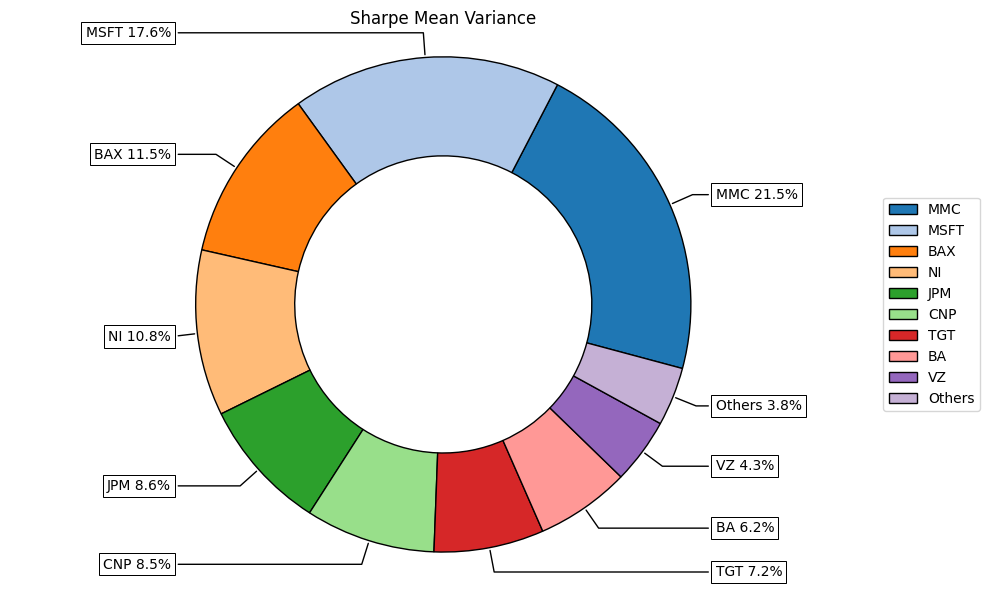

In [19]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.2 Plotting portfolio composition

In [20]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
# asset_classes = asset_classes.sort_values(by=['Assets'])

views = {'Disabled': [False, False, False],
         'Type': ['Classes', 'Classes', 'Classes'],
         'Set': ['Industry', 'Industry', 'Industry'],
         'Position': ['Energy', 'Consumer Staples', 'Materials'],
         'Sign': ['>=', '>=', '>='],
         'Weight': [0.08, 0.1, 0.09], # Annual terms 
         'Type Relative': ['Classes', 'Classes', 'Classes'],
         'Relative Set': ['Industry', 'Industry', 'Industry'],
         'Relative': ['Financials', 'Utilities', 'Industrials']}

views = pd.DataFrame(views)

display(views)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative
0,False,Classes,Industry,Energy,>=,8.0000%,Classes,Industry,Financials
1,False,Classes,Industry,Consumer Staples,>=,10.0000%,Classes,Industry,Utilities
2,False,Classes,Industry,Materials,>=,9.0000%,Classes,Industry,Industrials


Black-Litterman 모델에서 **View**를 만드는 과정은 투자자의 시장에 대한 의견을 수치적으로 표현하는 것입니다. 뷰는 특정 자산이나 자산 그룹에 대해 가지는 의견이나 전망을 반영하며, 이를 통해 최적화된 포트폴리오를 구성할 수 있습니다. 뷰는 특정 자산이 다른 자산보다 더 높은(혹은 낮은) 수익을 낼 것이라는 주관적인 판단을 기반으로 만들어집니다.

### 뷰(View) 생성의 기본 개념

뷰는 두 가지 주요 구성 요소로 나뉩니다:

1. **P 매트릭스 (Pick Matrix)**: 자산에 대한 상대적인 가중치를 나타냅니다. 어떤 자산의 비중을 높이거나 줄이고 싶을 때 사용됩니다.
2. **Q 벡터 (View Vector)**: 특정 자산 또는 자산 그룹에 대한 예상 수익률의 변화를 나타냅니다.

### 뷰 생성 단계

1. **투자자가 가진 뷰 정의**:
   - 특정 자산이나 자산 그룹이 상대적으로 더 높은 수익을 올릴 것인지, 아니면 낮은 수익을 올릴 것인지에 대한 주관적인 판단을 내립니다.

2. **P 매트릭스 구성**:
   - 각 뷰에 대해 자산의 상대적인 비중을 설정합니다. 특정 자산의 비중을 늘리고 싶다면 양수의 값을, 줄이고 싶다면 음수의 값을 부여합니다.
   - 예를 들어, 기술(Tech) 섹터의 비중을 20% 이상으로 설정하고, 금융(Finance) 섹터와 비교하고자 할 때, `Tech`에 양수 값을 부여하고, `Finance`에 음수 값을 부여할 수 있습니다.

3. **Q 벡터 구성**:
   - P 매트릭스에 따라 자산에 대한 기대 수익률의 변화를 설정합니다. 이 값은 특정 자산 또는 자산 그룹에 대해 기대되는 추가 수익률(또는 손실)을 나타냅니다.

### 예시: 뷰 생성

다음은 뷰를 생성하는 방법을 설명하는 예시입니다:

#### 1. 자산 클래스 정의

```python
asset_classes = {
    'Assets': ['Tech', 'Finance', 'Energy', 'Industrials', 'Health', 'Utilities'],
    'Industry': ['Tech', 'Finance', 'Energy', 'Industrials', 'Health', 'Utilities']
}

asset_classes = pd.DataFrame(asset_classes)
```

#### 2. 투자자의 뷰 정의

투자자가 `Tech` 섹터가 `Finance` 섹터보다 더 높은 수익을 낼 것이라고 생각하고, `Energy` 섹터가 `Industrials` 섹터보다 낮은 수익을 낼 것이라고 가정해봅시다.

```python
views = {
    'Disabled': [False, False],               # 두 개의 뷰가 활성화
    'Type': ['Classes', 'Classes'],           # 뷰의 타입은 자산 클래스에 기반
    'Set': ['Industry', 'Industry'],          # 산업 섹터를 기준으로 함
    'Position': ['Tech', 'Energy'],           # Tech 섹터에 대해 첫 번째 뷰, Energy 섹터에 대해 두 번째 뷰
    'Sign': ['>=', '<='],                     # Tech는 Finance보다 크거나 같음, Energy는 Industrials보다 작거나 같음
    'Weight': [0.20, 0.10],                   # Tech는 20% 이상, Energy는 10% 이하
    'Type Relative': ['Classes', 'Classes'],  # 비교하는 상대도 자산 클래스
    'Relative Set': ['Industry', 'Industry'], # 비교 기준도 산업 섹터
    'Relative': ['Finance', 'Industrials']    # Tech를 Finance와, Energy를 Industrials와 비교
}

views = pd.DataFrame(views)
display(views)
```

#### 3. P와 Q 매트릭스 생성

```python
P, Q = rp.assets_views(views, asset_classes)
```

`P` 매트릭스는 각 뷰에 대한 자산의 상대적인 가중치를 나타내고, `Q` 벡터는 각 뷰에서 설정한 기대 수익률의 변화를 나타냅니다.

### P와 Q 매트릭스에 대한 해석

- **P 매트릭스**: 
  - `Tech`와 `Finance`의 상대적 비중을 나타냅니다. 예를 들어, `Tech`의 비중이 20% 이상이므로 `P`에서 `Tech`에 양의 값을 부여하고 `Finance`에는 음의 값을 부여합니다.
  - `Energy`와 `Industrials`에 대해서도 유사하게 처리됩니다.

- **Q 벡터**: 
  - 각 뷰에 대해 예상되는 수익률 변화를 설정합니다. 예를 들어, `Tech` 섹터가 `Finance` 섹터보다 2% 더 높은 수익을 올릴 것이라고 생각하면 `Q`에서 0.02의 값을 부여할 수 있습니다.

### 요약

뷰(View)를 생성하는 과정은 투자자의 시장 전망을 구체적으로 모델링하고, 이를 포트폴리오 최적화 과정에 반영하기 위한 첫 단계입니다. `P`와 `Q` 매트릭스를 통해 투자자의 뷰를 수치적으로 표현하고, Black-Litterman 모델을 통해 조정된 기대 수익률과 공분산을 계산하여 최적의 포트폴리오를 구성합니다.

In [32]:
P, Q = rp.assets_views(views, asset_classes)

display(pd.DataFrame(P, columns=asset_classes['Assets']))
display(pd.DataFrame(P.T, index=asset_classes['Assets']))
display(pd.DataFrame(Q))

Assets,JCI,TGT,CMCSA,CPB,MO,APA,MMC,JPM,ZION,PSA,...,TMO,DE,MSFT,HPQ,SEE,VZ,CNP,NI,T,BA
0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,100.0000%,-20.0000%,-20.0000%,-20.0000%,-20.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,-20.0000%
1,0.0000%,0.0000%,0.0000%,50.0000%,50.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,-50.0000%,-50.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,-25.0000%,0.0000%,0.0000%,100.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


,0,1,2
Assets,,,
JCI,0.0000%,0.0000%,0.0000%
TGT,0.0000%,0.0000%,0.0000%
CMCSA,0.0000%,0.0000%,0.0000%
CPB,0.0000%,50.0000%,0.0000%
MO,0.0000%,50.0000%,0.0000%
APA,100.0000%,0.0000%,0.0000%
MMC,-20.0000%,0.0000%,0.0000%
JPM,-20.0000%,0.0000%,0.0000%
ZION,-20.0000%,0.0000%,0.0000%


,0
0,8.0000%
1,10.0000%
2,9.0000%


In [22]:
# Estimate Black Litterman inputs:

port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)

# Estimate optimal portfolio:

model='BL'# Black Litterman
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_bl.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,3.3196%,8.2331%,5.5942%,5.4020%,16.6324%,0.0000%,0.0000%,0.0000%,0.0000%,...,10.0406%,0.0000%,0.0000%,0.0000%,13.9982%,6.1071%,0.0000%,0.0000%,4.2394%,0.0000%


연간 수익률을 일간 수익률로 변환하는 이유는 데이터의 시간 단위가 일간 수익률로 되어 있기 때문입니다. 이를 통해 Black-Litterman 모델의 입력 값들이 동일한 시간 단위로 맞추어집니다. 자세히 설명하겠습니다.

### 이유

1. **일관된 시간 단위**:
   - Black-Litterman 모델에서 기대 수익률과 리스크(공분산)는 동일한 시간 단위로 계산되어야 합니다.
   - 다운로드된 데이터와 계산된 공분산 행렬이 일간 단위로 되어 있는 경우, 전망 수익률도 같은 단위로 변환해야 일관성을 유지할 수 있습니다.

2. **정확한 계산**:
   - 연간 수익률을 일간 수익률로 변환하여, 모델에서 일간 수익률을 기반으로 한 공분산 행렬과 함께 사용할 수 있습니다.
   - 이를 통해 포트폴리오 최적화가 정확하게 수행됩니다.

3. **Black-Litterman 모델의 특성**:
   - Black-Litterman 모델은 수익률 벡터(전망)와 공분산 행렬을 결합하여 최적의 포트폴리오를 생성합니다.
   - 이때, 수익률 벡터와 공분산 행렬이 동일한 시간 단위로 표현되지 않으면, 최적화 과정에서 잘못된 결과를 초래할 수 있습니다.

### 연간 수익률을 일간 수익률로 변환하는 방법

연간 수익률을 일간 수익률로 변환하는 가장 간단한 방법은 연간 수익률을 252(일반적인 금융 시장의 거래 일수)로 나누는 것입니다. 이렇게 하면 연간 수익률을 일간 수익률로 변환할 수 있습니다.

예를 들어, 연간 수익률이 0.02(2%)인 경우:
$$ \text{일간 수익률} = \frac{0.02}{252} \approx 0.000079 $$

### 예제 코드

```python
# 연간 수익률을 일간 수익률로 변환하여 전망 설정
Q = np.array([[0.02], [0.015]])  # 연간 수익률 전망
Q_daily = Q / 252  # 일간 수익률로 변환

# Black-Litterman 입력값 추정
port.blacklitterman_stats(P, Q_daily, rf=rf, w=w, delta=None, eq=True)
```

### 결론

연간 수익률을 일간 수익률로 변환하는 것은 Black-Litterman 모델의 입력값들이 일관된 시간 단위로 계산되도록 하여, 포트폴리오 최적화 과정에서 정확하고 신뢰할 수 있는 결과를 얻기 위함입니다. 이렇게 하면 전망 수익률과 공분산 행렬이 동일한 시간 단위로 맞추어져, 모델의 계산이 정확하게 이루어집니다.

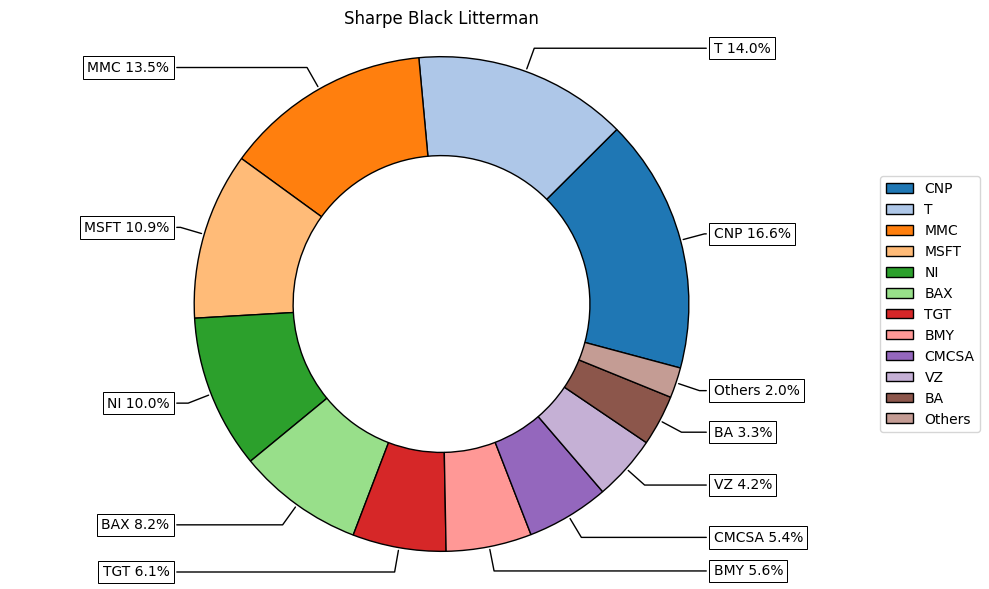

In [23]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [24]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,5.2378%,4.3878%,2.1295%,6.9903%,3.2270%,0.0743%,0.0000%,2.8448%,...,11.4529%,0.0000%,14.9248%,0.1681%,6.5896%,4.0899%,0.0000%,0.0000%,8.2768%,0.0000%
1,0.0000%,1.7305%,7.3666%,4.9883%,3.9951%,11.5025%,1.0917%,0.0586%,0.0000%,0.0500%,...,11.4925%,0.0000%,8.7816%,0.0000%,10.2068%,5.2495%,0.0000%,0.0000%,6.7187%,0.0000%
2,0.0000%,2.3604%,7.7865%,5.1517%,4.5169%,13.3123%,0.1684%,0.0000%,0.0000%,0.0000%,...,11.4174%,0.0000%,6.1082%,0.0000%,11.7237%,5.6488%,0.0000%,0.0000%,6.2134%,0.0000%
3,0.0000%,2.8284%,8.0483%,5.3391%,4.9280%,14.8240%,0.0000%,0.0000%,0.0000%,0.0000%,...,11.0276%,0.0000%,3.3130%,0.0000%,12.8201%,5.9021%,0.0000%,0.0000%,5.4981%,0.0000%
4,0.0000%,3.1951%,8.2178%,5.5323%,5.2744%,16.1692%,0.0000%,0.0000%,0.0000%,0.0000%,...,10.4709%,0.0000%,0.5392%,0.0000%,13.6490%,6.0698%,0.0000%,0.0000%,4.6576%,0.0000%


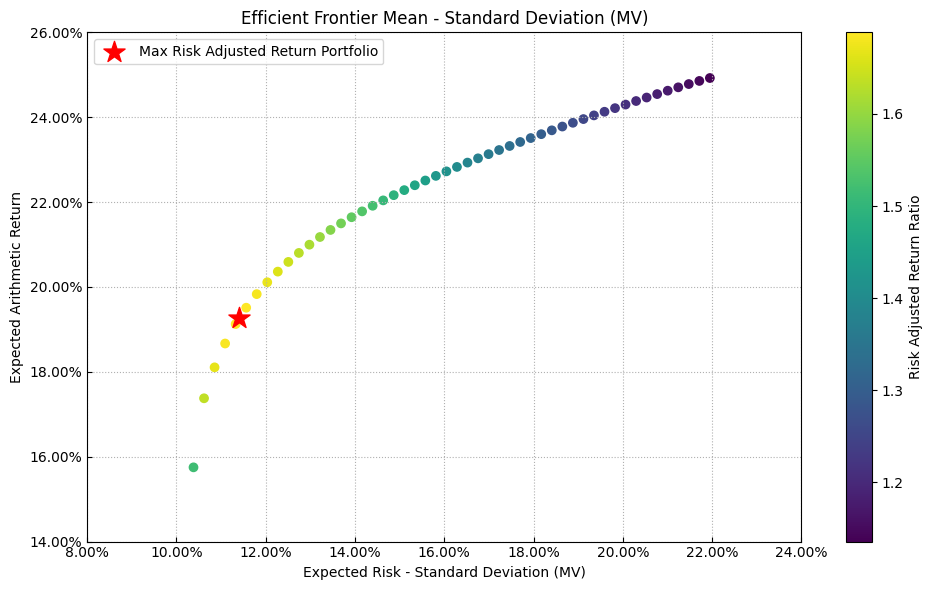

In [25]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_bl, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

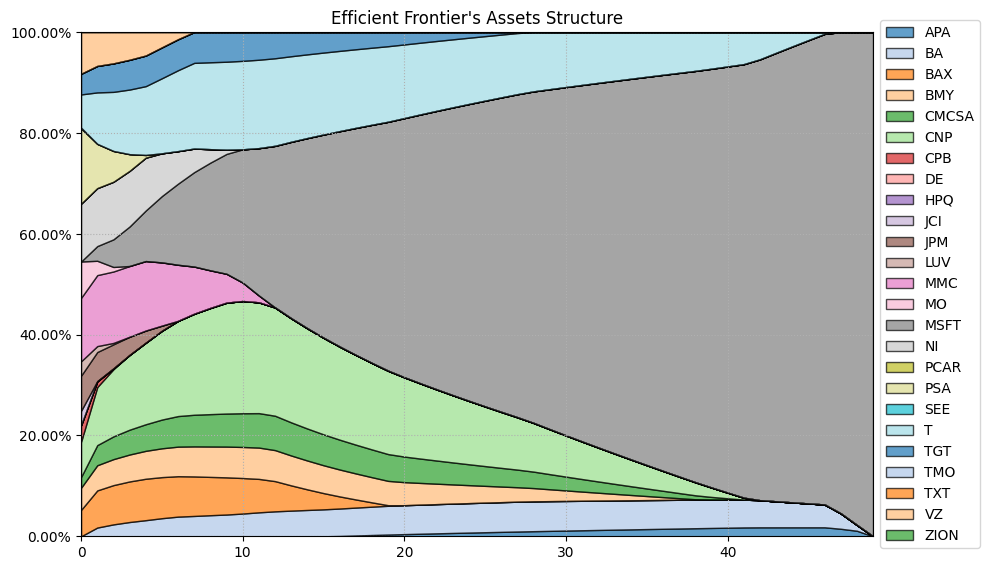

In [26]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Black Litterman Mean Risk Portfolios

### 3.4 Calculate Black Litterman Portfolios for Several Risk Measures

In [27]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])
port.alpha = 0.05

for i in rms:
    if i == 'MV':
        hist = False
    else:
        hist = True
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [28]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,3.32%,4.68%,2.25%,4.37%,2.02%,0.00%,0.00%,0.00%,6.94%,5.77%,2.29%,5.25%,0.40%
BAX,8.23%,8.44%,7.50%,7.00%,7.45%,10.53%,4.50%,0.00%,0.00%,5.12%,0.00%,0.80%,0.00%
BMY,5.59%,3.54%,4.02%,4.33%,4.10%,2.11%,7.77%,12.32%,7.19%,0.00%,0.00%,0.00%,0.77%
CMCSA,5.40%,3.36%,4.92%,3.20%,5.11%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,16.63%,11.81%,17.51%,13.24%,18.15%,22.83%,39.83%,20.92%,51.04%,15.77%,35.36%,21.60%,44.01%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.46%,9.79%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,0.00%,0.70%,0.00%,0.30%,0.00%,0.00%,0.00%,0.00%,2.88%,0.00%,0.00%,0.00%,0.00%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

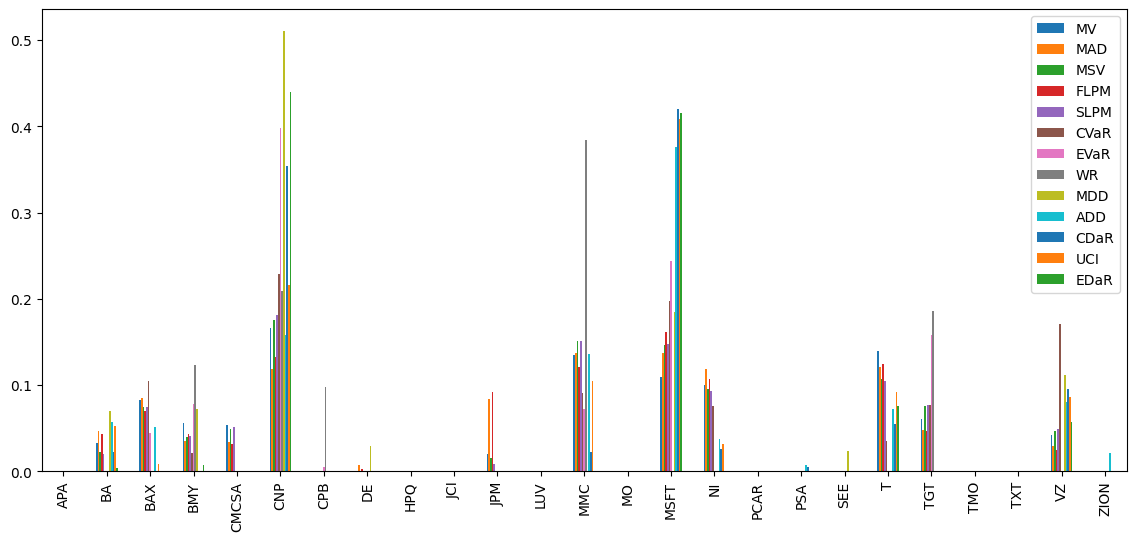

In [29]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)